# [Lab Session 2](otsu.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

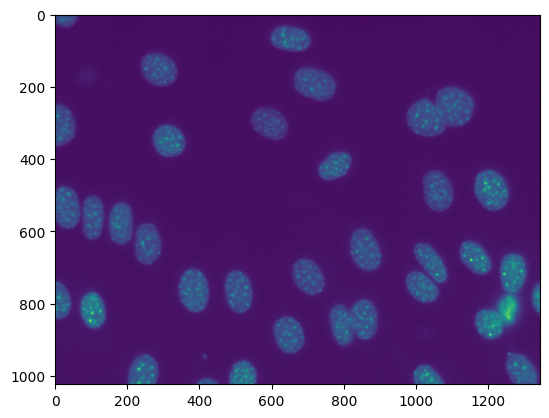

In [2]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")
plt.imshow(imgf)

**[Task 1.2.]()** Quantify the image into 256 bins:

In [3]:
img8 = (imgf * 255).round().astype(np.uint8)

#Bild vorher hat Werte zwischen 0 und 1 für die Intensitäten
#umschreiben in Werte zwischen 0 und 255 (256 bins) -> *255; runden, in imagedata format speichern


**[Task 1.3.]()** Compute the image histogram:

In [4]:
#compute histogram wihtout functions

h = np.zeros(256)    #leerer array mit 256 Stellen
for i in range(256):
    h[i] = np.sum(img8 == i)     #For each intensity i, count the pixels in img8 with that intensity using np.sum(img8 == i)



Show the computed histogram:

<BarContainer object of 256 artists>

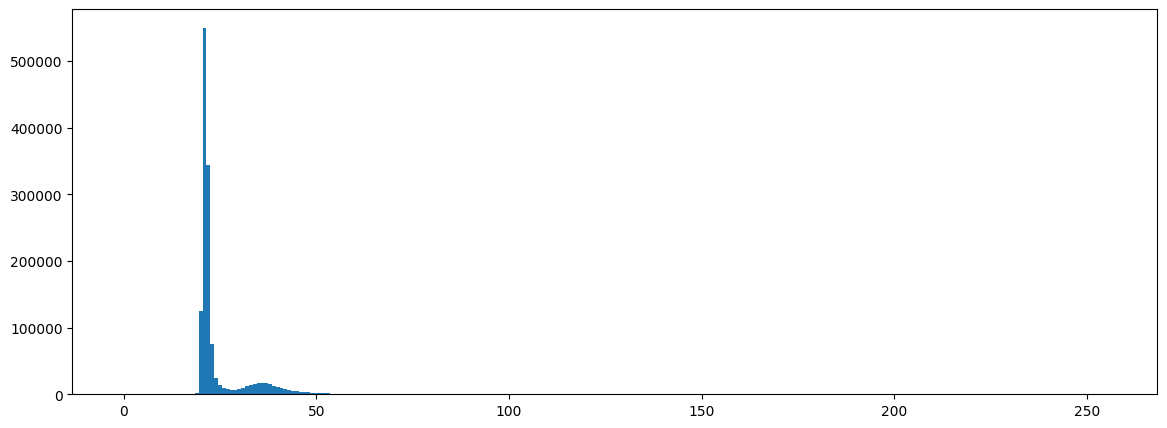

In [5]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [ ]:
#computing the optimal intensity treshold T 
#basically implementing two groups (one below, one above T)
#  -> compute count & cariance of the groups
# define the formula -> calculate the min
T_pos_list = []     #leere Liste erstellen

for T in range(1,256):        #alle möglichen Werte fpr einen treshold T durchgehen (kann jeden Wert von 0 bis 255 einnehmen)
    #für jeden dieser möglichen T Werte wird Otsu wert berechnet & an Liste angehängt
    T_opt = np.sum(img8 < T) * np.var(img8[img8 < T]) + np.sum(img8 >= T) * np.var(img8[img8 >= T])
    T_pos_list.append(T_opt)


#neue Liste erstellt mit den Werten der liste die nicht nan sind -> um min zu berechnen sonst kommt 0 raus
T_pos_list_onan = [x for x in T_pos_list if x is not None and not np.isnan(x)]

print(T_pos_list.index(min(T_pos_list_onan)))
# optimaler t Wert = 30 apparently





/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


30


**[Task 1.5.]()** Perform Otsu thresholding:

**[Task 1.6.]()** Compute the Dice coefficient: